In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
import pandas as pd
import numpy as np  
import sklearn
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 393s 2us/step


In [0]:
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

aviones= [np.random.choice(np.where(y_train==0)[0]) for k in range(100)]
pajaros= [np.random.choice(np.where(y_train==2)[0]) for k in range(100)]
#np.shape(aviones)[0]
z=np.ones((np.shape(aviones)[0],np.shape(aviones)[0]))
for i in range(np.shape(aviones)[0]):
  for j in range(i+1,np.shape(aviones)[0]):
    z[i,j]=ssim(x_train[aviones[i]]/255, x_train[aviones[j]]/255, multichannel=True)


En lo anterior simplemente se utilizó la función SSIM (structural similarity index) para estudiar la similaridad de las imágenes. En general es dificil establecer que exista una diferencia considerable en los ejemplos elegidos (avión-pájaro) debido ala baja calidad de las imágenes, incluso para uno es dificil distinguir los ejemplos anteriores. Es cierto que entre un perro y un avión se tendrá una ssim muy baja, pero aún así a priori no es posible decir si existe una similitud entre las imágenes. En base a la matriz anterior, es posible ver que existen valores más altos para una comparación entre avión-pájaro que para avión-avión. 

-0.13674568807969778

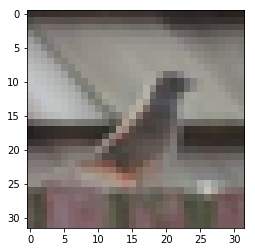

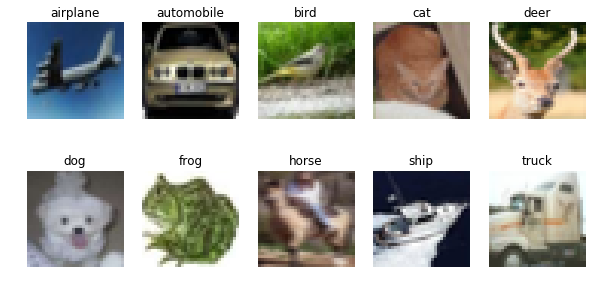

(40000, 32, 32, 3)

In [0]:
#@title

num_classes=len(label_names)
x_train , x_val , y_train , y_val = train_test_split(x_train, y_train, test_size=0.2, stratify = y_train)
import matplotlib.pyplot as plt
idx_dato = [np.random.choice(np.where(y_train==i)[0]) for i in range(10)] #sample from each class
f,axx = plt.subplots(2,5,figsize=(10,5))
for i, dato in enumerate(idx_dato):
    axx[int(i/5),i%5].imshow(x_train[dato])
    axx[int(i/5),i%5].axis('off')
    axx[int(i/5),i%5].set_title(label_names[i])
plt.show()
np.shape(x_train)

**(a)** En lo anterior tenemos 40500 imágenes de 32x32. Notemos que no solo visualizamos los datos en esta parte, si no que también creamos los datos de validación del problema. Copiando el problema 1, utilizaremos el 20% de los datos como **Conjunto de validación** 

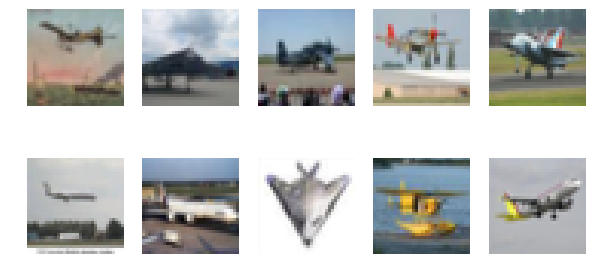

In [0]:
a= [np.where(y_train==0)[0]]
b=[np.random.choice(a[0]) for k in range(10)]
x,y=plt.subplots(2,5,figsize=(10,5))
for m,n in enumerate(b):
  y[int(m/5) ,m%5].imshow(x_train[n])
  y[int(m/5) , m%5].axis('off')

  #import skimage
from skimage import measure
#from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
#SIM = measure.compare_ssim(x_train[n], x_train[b[0]])


 **(B)**  
 * A continuación, buscamos preparar los datos de validación y entrenamiento a ser utilizados en nuestra red. Con esto simplemente creamos una matriz categórica binaria la cual nos indica cómo se comportan nuestros datos de validación (que son, a todo esto, representativos en base a la muestra original) en base a las 10 categorías exhibidas anteriormente. 

*   El hecho de dividir por 255 los valores es simplemente para normalizar los datos. (Notar que el máxmio y mínimo valor de los datos de entrenamiento son 255 y 0, respectivamente). Por lo tanto lo que simplemente se está realizando es la normalización de ellos, para hacer que esten en un entorno cercano a la bola unitaria con centro 0.  (Notar que el 255 sale de las $2^8$ posibilidades binarias.)

 

In [0]:
import keras
#x_train = x_train.transpose([0, 3, 1, 2]) #if 'th' dim-ordering is used
#x_test= x_test.transpose([0, 3, 1, 2]) 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
Xnorm_train = x_train.astype('float32')/255
Xnorm_val = x_val.astype('float32')/255
Xnorm_test = x_test.astype('float32')/255

**(C)** 
Nos ponemos manos a la obra y creamos, como pide la tarea, una red neuronal del estilo **C x P x C x P x F x F**.  Para el estudio de la dimensionalidad notemos que en el padding utilizamos la opción 'same', lo cual permite mantener el volumen de la capa. Entonce, viendo el summary es posible ver que
* Convolución 1: **32 x 32 x 32**
* Pooling 1 : **16 x 16 x 32**
* Convolución 2: **16 x 16 x 64**
* Pooling 2 : **8 x 8 x 64**
* Flatten (comprimimos todo) : 4096

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dens

**(D)** En lo que sigue, entrenaremos el modelo anterior con 2 diferente métodos: SGD y RMSProp, para estudiar sus diferencias. La idea es, luego de realizar este paso, poder ver cómo variar tanto el número de filtros como su tamaño y ver si es posible hacer algo con las capas a del modelo para mejorarlo.

In [0]:
#ENTRENAMIENTO CON SGD
from keras.optimizers import SGD, rmsprop
opt = SGD(lr=1e-4,decay=1e-6)
model.compile( optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(Xnorm_train, y_train ,epochs=25, validation_data=(Xnorm_val,y_val))


Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 11s 279us/step - loss: 2.2966 - acc: 0.1247 - val_loss: 2.2894 - val_acc: 0.1329
Epoch 2/25
40000/40000 [==============================] - 6s 138us/step - loss: 2.2841 - acc: 0.1414 - val_loss: 2.2803 - val_acc: 0.1440
Epoch 3/25
40000/40000 [==============================] - 6s 148us/step - loss: 2.2759 - acc: 0.1512 - val_loss: 2.2728 - val_acc: 0.1612
Epoch 4/25
40000/40000 [==============================] - 6s 152us/step - loss: 2.2684 - acc: 0.1690 - val_loss: 2.2653 - val_acc: 0.1730
Epoch 5/25
40000/40000 [==============================] - 6s 139us/step - loss: 2.2606 - acc: 0.1802 - val_loss: 2.2572 - val_acc: 0.1813
Epoch 6/25
40000/40000 [==============================] - 6s 139us/step - loss: 2.2522 - acc: 0.1897 - val_loss: 2.2485 - val_acc: 0.1862
Epoch 7/25
40000/40000 [==============================] - 6s 138us/step -

Para los primeros 25 epochs realizados se obtiene el gráfico que se ve abajo. Es posible ver que, efectivamente, el error va decreciendo y, con los datos de arriba, que el *accuracy* va aumentando lo cual los indica que la red sí está aprendiendo. Pero aún así tenemos dos problemas: 


1.   El error es aún alto y, a pesar de que decrece 'rápidamente', se podría hacer mejor.
2.   El accuracy es muy bajo.

Veamos qué sucede con el método RMSProp, haremos su análisis y lo compararemos con SGD.



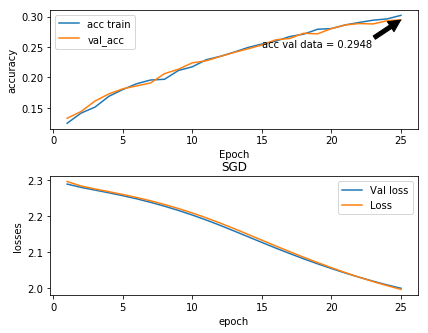

In [0]:
plt.figure(1)


plt.subplot(211)

plt.plot(np.arange(1,26,1), hist.history['acc'])
plt.plot(np.arange(1,26,1), hist.history['val_acc'])
plt.legend(['acc train', 'val_acc'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.annotate('acc val data = 0.2948', xy=(25,0.2948), xytext=(15,0.25), arrowprops=dict(facecolor='black', shrink=0.01))

plt.subplot(212)
plt.plot(np.arange(1,26,1), hist.history['val_loss'])
plt.plot(np.arange(1,26,1),hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Val loss', 'Loss'])
plt.title('SGD')

plt.subplots_adjust(top=0.99, bottom=0.001, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)


** Definimos un nuevo modelo para poder aplicar RMSProp sobre él.** 

In [0]:
#Entrenamiento con RMSProp

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 7s 172us/step - loss: 1.6749 - acc: 0.4050 - val_loss: 1.4516 - val_acc: 0.4875
Epoch 2/25
40000/40000 [==============================] - 6s 162us/step - loss: 1.3495 - acc: 0.5265 - val_loss: 1.3269 - val_acc: 0.5433
Epoch 3/25
40000/40000 [==============================] - 7s 166us/step - loss: 1.2122 - acc: 0.5791 - val_loss: 1.2183 - val_acc: 0.5764
Epoch 4/25
40000/40000 [==============================] - 7s 171us/step - loss: 1.1208 - acc: 0.6091 - val_loss: 1.1631 - val_acc: 0.5965
Epoch 5/25
40000/40000 [==============================] - 7s 163us/step - loss: 1.0484 - acc: 0.6364 - val_loss: 1.1089 - val_acc: 0.6124
Epoch 6/25
40000/40000 [==============================] - 6s 162us/step - loss: 0.9894 - acc: 0.6590 - val_loss: 1.0548 - val_acc: 0.6352
Epoch 7/25
40000/40000 [==============================] - 6s 162us/step - loss: 0.9394 - acc: 0.6757 - val_loss: 1.0195 - 

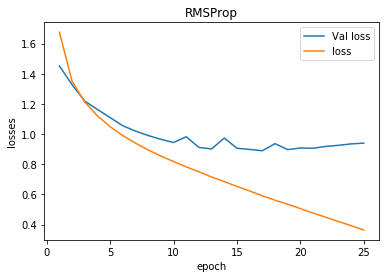

In [0]:
opt = rmsprop(lr=1e-4, decay=1e-6)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

#ploteo del error
plt.figure(2)


plt.subplot(211)

plt.plot(np.arange(1,26,1), hist1.history['acc'])
plt.plot(np.arange(1,26,1), hist1.history['val_acc'])
plt.legend(['acc train', 'val_acc'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.annotate('acc val data = 0.7098', xy=(25,0.7098), xytext=(15,0.6), arrowprops=dict(facecolor='black', shrink=0.01))

plt.subplot(212)
plt.plot(np.arange(1,26,1), hist1.history['val_loss'])
plt.plot(np.arange(1,26,1),hist1.history['loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Val loss', 'Loss'])
plt.title('RMSProp')

plt.subplots_adjust(top=0.99, bottom=0.001, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)



#plt.plot(np.arange(1,26,1), hist1.history['val_loss'])
#plt.plot(np.arange(1,26,1), hist1.history['loss'])
#plt.xlabel('epoch')
#plt.ylabel('losses')
#plt.title('RMSProp')
#plt.legend(['Val loss', 'loss'])

Notemos que efectivamente el error es mucho menor, PERO nuestros datos de validación se alejan considerablemente del error de los datos de testeo, lo cual no implica una mejor del todo en nuestro modelo, ya que esa distancia implica que existe una *overfiting* en nuestro modelo. Lo que sí implica una mejora es en *accuarcy* el cual llega a 70%, lo que es suficiente para asegurar que RMSProp es más preciso en este tipo de situaciones

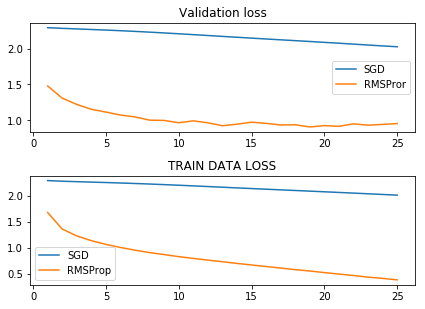

In [0]:
plt.figure(1)
plt.subplot(211)
plt.plot(np.arange(1,26,1), hist.history['val_loss'])
plt.plot(np.arange(1,26,1), hist1.history['val_loss'])
plt.legend(['SGD', 'RMSPror'])
plt.title('Validation loss')
plt.axis('on')


plt.subplot(212)
plt.plot(np.arange(1,26,1), hist.history['loss'])
plt.plot(np.arange(1,26,1), hist1.history['loss'])
plt.legend(['SGD','RMSProp'])
plt.title('TRAIN DATA LOSS')



plt.subplots_adjust(top=0.99, bottom=0.08, left=0.1, right=0.99, hspace=0.4,
                    wspace=0.35)
plt.show()

  **(E)** Para este caso, utilizaremos el método de optimización de RMSProp ya que fue el que tuvo mayor diferencia de error entre el **val loss** y el **loss**. Esto generalmente se debe a un *overfitting*, por lo tanto nuestra intuición nos dice que debemos remover capas del modelo. Pero ello producirá una menor precisión en el modelo, lo cual no compensa la pérdida. Es por eso que la idea es aumentar el número de capas (con ello aumentarán los parámetros y, por lo tanto, el overfiting) y aplicar un regularizador para compensar lo anterior descrito. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
dense_40 (Dense)             (None, 8, 8, 64)          4160      
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)              0         
__________

Text(0.5, 1.0, 'Capas')

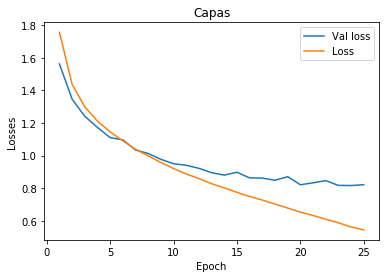

In [0]:
#CREAMOS UN NUEVO MODELO EL CUAL TENDRÁ MÁS CAPAS PARA PODER COMPARAR LOS ERRORES 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, rmsprop
model_capas= Sequential()
model_capas.add(Conv2D (32,(3 , 3), padding='same',input_shape=Xnorm_train.shape[1:],activation='relu') )
#model_capas.add(Dense(32, input_dim=Xnorm_train.shape[1], activation='relu'))
#model_capas.add(BatchNormalization(axis=-1))
model_capas.add(MaxPooling2D(2,2))
#model_capas.add(Dropout(rate=0.25))
model_capas.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))

#model_capas.add(Dense(64, input_dim=Xnorm_train.shape[1], activation='relu'))
#model_capas.add(BatchNormalization(axis=-1))
model_capas.add(MaxPooling2D(pool_size=(2,2)))

model_capas.add(Dropout(rate=0.25))
model_capas.add(Dense(64, input_dim=Xnorm_train.shape[1], activation='relu'))
#model_capas.add(Conv2D(128, (3,3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
#model_capas.add(MaxPooling2D(pool_size=(2,2)))
#model_capas.add(Conv2D(256, (3,3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
#model_capas.add(MaxPooling2D(pool_size=(2,2)))
model_capas.add(Flatten())
model_capas.add(Dense(512,activation='relu'))
model_capas.add(Dense(10,activation='softmax'))
model_capas.summary()

opt = rmsprop(lr=1e-4, decay=1e-6)
model_capas.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist_capas = model_capas.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.plot(np.arange(1,26,1),hist_capas.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_capas.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Val loss', 'Loss'])
plt.title('Capas')

Como dijimos anteriormente, añadimos una capa densa de 64 entradas lo cuál se esparaba que mejorara el modelo. Ello ocurrió aumentando a un 72% el *accuracy* del modelo, pero lo anterior aumentó la diferencia del loss entre los datos de validación y los datos de entrenamiento. Es por eso que se aplicó un regularizador que logró amortiguar dicho *overfiting*. 

**(F)** En lo que sigue, añadimos a la primera capa convolucional el doble de filtros para estudiar el significado de esto. Comparamos pirmero el comportamiento del modelo entrenándolo con SGD. Es posible ver que duplicando la cantidad de filtros de la primera capa convolucional no mejorór en absoluto el *accuracy* del modelo.  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

NameError: ignored

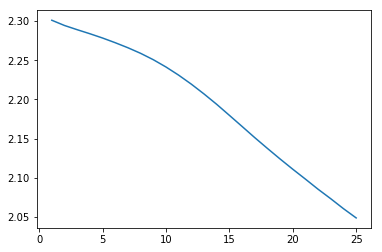

In [0]:
#MODELO CON DUPLICADO DE CANTIDAD DE FILTROS EN PRIMERA CAPA CONVOLUCIONAL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model2= Sequential()
model2.add(Conv2D (64,(3 , 3), padding='same',input_shape=Xnorm_train.shape[1:],activation='relu') )
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

opt=SGD(lr=1e-4 , decay=1e-6)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(Xnorm_train , y_train, epochs=25, validation_data= (Xnorm_val, y_val))

plt.plot(np.arange(1,26,1), hist2.history['val_loss'])
plt.plot(np.arange(1,26,1), hist.history['val_loss'])
plt.legend(['SGD Model 1', 'SGD model 2'])

Para el caso SGD, no se nota un cambio entre la diferencia de loss entre los datos de validación y pérdida, pero lo que sí se puede observar es que el *accuracy* baja a 25% en contraste con el modelo original que tiene un 29%. En general, esto no conviene para modelo y no interesa tanto proseguir con SGD ya que se vió que el modelo funciona mucho mejor con RMSProp. Veamos qué sucede al aumentar la cantidad de filtros de la primera capa convolucional

In [0]:
#Análogamente, probamos aumentar la cantidad de filtros pero entrenando la red con RMSProp

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model2_rms= Sequential()
model2_rms.add(Conv2D (64,(6 , 6), padding='same',input_shape=Xnorm_train.shape[1:],activation='relu') )
model2_rms.add(MaxPooling2D(2,2))
model2_rms.add(Conv2D(64, (6,6), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model2_rms.add(MaxPooling2D(pool_size=(2,2)))
model2_rms.add(Flatten())
model2_rms.add(Dense(512,activation='relu'))
model2_rms.add(Dense(10,activation='softmax'))
model2_rms.summary()

opt=rmsprop(lr=1e-4, decay=1e-6)
model2_rms.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist2_rms = model2_rms.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 64)        6976      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        147520    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_44 (Dense)             (None, 10)                5130      
Total para

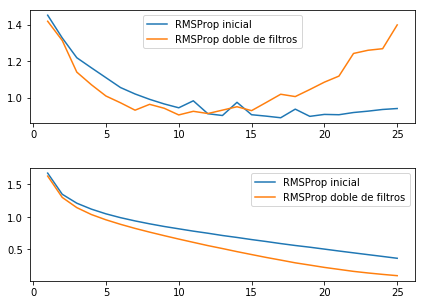

In [0]:
plt.figure(2)
plt.subplot(211)
plt.plot(np.arange(1,26,1), hist1.history['val_loss'])
plt.plot(np.arange(1,26,1), hist2_rms.history['val_loss'])
plt.legend(['RMSProp inicial', 'RMSProp doble de filtros'])

plt.subplot(212)
plt.plot(np.arange(1,26,1), hist1.history['loss'])
plt.plot(np.arange(1,26,1), hist2_rms.history['loss'])
plt.legend(['RMSProp inicial', 'RMSProp doble de filtros'])

plt.subplots_adjust(top=0.99, bottom=0.05, left=0.1, right=0.99, hspace=0.4,
                    wspace=0.35)
plt.show()

Es posible observar que el *accuracy* disminuyó en 1% llegando a 69% (casi 70% en realidad), esto se contrapone con lo hecho en el ejercicio **(E)**.

(g) Análogo a lo anterior, en vez de duplicar la cantidad de filtros utilizados, duplicamos el tamaño de éstos.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        3488      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_46 (Dense)             (None, 10)                5130      
Total para

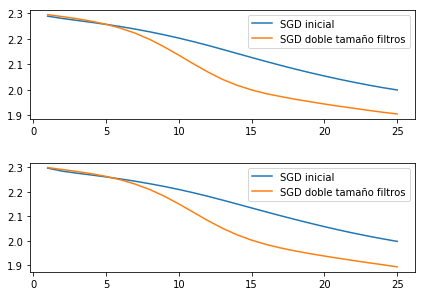

In [0]:
#MODELO CON DUPLICADO DE TAMAÑO DE FILTROS 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model3= Sequential()
model3.add(Conv2D (32,(6 , 6), padding='same',input_shape=Xnorm_train.shape[1:],activation='relu') )
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (6,6), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.summary()

opt=SGD(lr=1e-4, decay=1e-6)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.figure(3)
plt.subplot(211)
plt.plot(np.arange(1,26,1), hist.history['val_loss'])
plt.plot(np.arange(1,26,1), hist3.history['val_loss'])
plt.legend(['SGD inicial', 'SGD doble tamaño filtros'])

plt.subplot(212)
plt.plot(np.arange(1,26,1), hist.history['loss'])
plt.plot(np.arange(1,26,1), hist3.history['loss'])
plt.legend(['SGD inicial', 'SGD doble tamaño filtros'])

plt.subplots_adjust(top=0.99, bottom=0.08, left=0.1, right=0.99, hspace=0.4,
                    wspace=0.35)
plt.show()

En este caso, al aumentar el tamaño de los filtros, se aumentó a 33% el accuracy del modelo. Ello puede ser debido a que al ser el filtro más grande y mantener la misma cantidad, la red logra ver y almacenar más parámetros.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        3488      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5130      
Total para

NameError: ignored

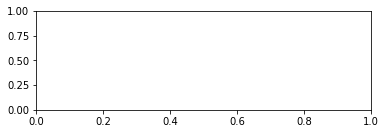

In [0]:
#Análogamente al ejercicio g, lo probamos con RMSProp
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model3_rms= Sequential()
model3_rms.add(Conv2D (32,(6 , 6), padding='same',input_shape=Xnorm_train.shape[1:],activation='relu') )
model3_rms.add(MaxPooling2D(2,2))
model3_rms.add(Conv2D(64, (6,6), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model3_rms.add(MaxPooling2D(pool_size=(2,2)))
model3_rms.add(Flatten())
model3_rms.add(Dense(512,activation='relu'))
model3_rms.add(Dense(10,activation='softmax'))
model3_rms.summary()

opt=rmsprop(lr=1e-4, decay=1e-6)
model3_rms.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist3_rms = model3_rms.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.figure(3)
plt.subplot(211)
plt.plot(np.arange(1,26,1), hist1.history['val_loss'])
plt.plot(np.arange(1,26,1), hist3_rms.history['val_loss'])
plt.legend(['RMSProp inicial', 'RMSProp doble tamaño filtros'])

plt.subplot(212)
plt.plot(np.arange(1,26,1), hist1.history['loss'])
plt.plot(np.arange(1,26,1), hist3_rms.history['loss'])
plt.legend(['RMSProp inicial', 'RMSProp doble tamaño filtros'])

plt.subplots_adjust(top=0.99, bottom=0.08, left=0.1, right=0.99, hspace=0.4,
                    wspace=0.35)
plt.show()

Como se explicó anteriormente, el filtro tiene mayor visión para una igual cantidad de éstos. Ello no afectó en una mejor del accuracy de la red, llegando a 69%. 

 (h) **Comparación Modelo Incial vs Modelo con más convoluciones **

In [0]:
#SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD , rmsprop
  #Modelo inicial

model_inicial = Sequential()
model_inicial.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_inicial.add(MaxPooling2D(pool_size=(2, 2)))
model_inicial.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_inicial.add(MaxPooling2D(pool_size=(2, 2)))
model_inicial.add(Flatten())
model_inicial.add(Dense(512,activation='relu'))
model_inicial.add(Dense(10,activation='softmax'))
model_inicial.summary()

#**Modelo con dobles convoluciones**
model_doble=Sequential()
model_doble.add(Conv2D(32, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble.add(Conv2D(32, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble.add(MaxPooling2D(pool_size=(2,2)))
model_doble.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble.add(MaxPooling2D(pool_size=(2,2)))
model_doble.add(Flatten())
model_doble.add(Dense(512, activation='relu'))
model_doble.add(Dense(10,activation='softmax'))
model_doble.summary()

opt= SGD(lr=1e-4, decay= 1e-6)
model_inicial.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist_inicial= model_inicial.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

model_doble.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist_doble= model_doble.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.figure(3)
plt.subplot(221)
plt.plot(np.arange(1,26,1), hist_inicial.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_inicial.history['loss'])
plt.legend(['val loss inicial', 'loss inicial'], prop={'size': 7})
plt.title('Comparación Losses modelo inicial')


plt.subplot(222)
plt.plot(np.arange(1,26,1), hist_doble.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_doble.history['loss'])
plt.legend(['doble conv val loss', 'Doble conv loss'], prop={'size': 7})
plt.title('Comparación Losses modelo doble convolución')

plt.subplot(223)
plt.plot(np.arange(1,26,1), hist_inicial.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_doble.history['val_loss'])
plt.legend(['SGD inicial val loss', 'SGD doble conv val loss'], prop={'size': 7})
plt.title('Comparación val loss entre modelos')

plt.subplot(224)
plt.plot(np.arange(1,26,1), hist_inicial.history['loss'])
plt.plot(np.arange(1,26,1), hist_doble.history['loss'])
plt.legend(['SGD inicial loss', 'SGD doble conv loss'], prop={'size': 7})
plt.title('Comparación loss entre modelos')

plt.subplots_adjust(top=0.99, bottom=0.08, left=0.1, right=0.99, hspace=0.3,
                    wspace=0.4)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5130      
Total para

KeyboardInterrupt: ignored

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total para

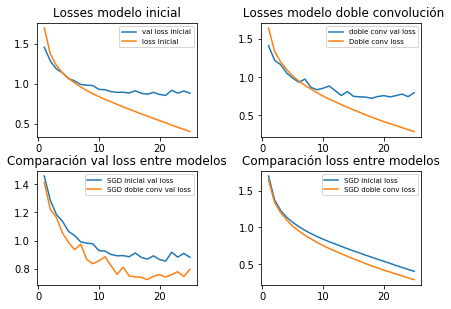

In [0]:
#RMSProp

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD , rmsprop
  #Modelo inicial

model_inicial_rms = Sequential()
model_inicial_rms.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_inicial_rms.add(MaxPooling2D(pool_size=(2, 2)))
model_inicial_rms.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_inicial_rms.add(MaxPooling2D(pool_size=(2, 2)))
model_inicial_rms.add(Flatten())
model_inicial_rms.add(Dense(512,activation='relu'))
model_inicial_rms.add(Dense(10,activation='softmax'))
model_inicial_rms.summary()

#**Modelo con dobles convoluciones**
model_doble_rms=Sequential()
model_doble_rms.add(Conv2D(32, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble_rms.add(Conv2D(32, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble_rms.add(MaxPooling2D(pool_size=(2,2)))
model_doble_rms.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble_rms.add(Conv2D(64, (3,3), padding='same', input_shape=Xnorm_train.shape[1:], activation='relu'))
model_doble_rms.add(MaxPooling2D(pool_size=(2,2)))
model_doble_rms.add(Dropout(0.25))
model_doble_rms.add(Flatten())
model_doble_rms.add(Dense(512, activation='relu'))
model_doble_rms.add(Dense(10,activation='softmax'))
model_doble_rms.summary()

opt= rmsprop(lr=1e-4, decay= 1e-6)
model_inicial_rms.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist_inicial_rms= model_inicial_rms.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

model_doble_rms.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist_doble_rms= model_doble_rms.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.figure(3)
plt.subplot(221)
plt.plot(np.arange(1,26,1), hist_inicial_rms.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_inicial_rms.history['loss'])
plt.legend(['val loss inicial', 'loss inicial'], prop={'size': 7})
plt.title('Losses modelo inicial')


plt.subplot(222)
plt.plot(np.arange(1,26,1), hist_doble_rms.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_doble_rms.history['loss'])
plt.legend(['doble conv val loss', 'Doble conv loss'], prop={'size': 7})
plt.title(' Losses modelo doble convolución')

plt.subplot(223)
plt.plot(np.arange(1,26,1), hist_inicial_rms.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_doble_rms.history['val_loss'])
plt.legend(['SGD inicial val loss', 'SGD doble conv val loss'], prop={'size': 7})
plt.title('Comparación val loss entre modelos')

plt.subplot(224)
plt.plot(np.arange(1,26,1), hist_inicial_rms.history['loss'])
plt.plot(np.arange(1,26,1), hist_doble_rms.history['loss'])
plt.legend(['SGD inicial loss', 'SGD doble conv loss'], prop={'size': 7})
plt.title('Comparación loss entre modelos')

plt.subplots_adjust(top=0.99, bottom=0.08, left=0.1, right=0.99, hspace=0.3,
                    wspace=0.4)
plt.show()

Lo que sucede aquí es bastante agradable a primera vista. Primero que nada, es posible observar que existe un overfiting increible en el caso de RMSProp, llegando a la última epoch con loss=0.0469 y val_loss=1.8328. Lo anterior es debido a que al haber más capas convolucionales, hay más parámetros y, por lo tanto, se estimula más el *overfiting*. Lo anterior no se compensó con una mejor *accuracy*, ya que es posible observar que llegó al 70% con más convoluciones, mientras que el inicial alcanzó el 71%. Por lo tanto, disminuyó el accuracy del modelo. 

Ahora bien, luego de haber descrito lo anterior (que fue sólamente añadir el código guía del enunciado), se vió que había un *overfiting* demasiado grande. Es por eso que se mantuvo la capa con el doble de convoluciones pero alfinal de éstas, se agregó un **regularizdor** antes de entrar a la capa densa FF. Ello mejoró significativamente los resultados, haciendo que el *overfiting* disminuyera considerablemente en comparación con el párrafo anterior y, lo mejor de todo, fue que el **accuracy** llegó a tener un valor de 76%, lo que implica que agregarle las capas convolucionales junto con el filtro, genera un mejor desempeño del modelo. Esto debido a que, al aumentar la cantidad de parámetros, se tenía más precisión pero con el dropout se logran filtrar (en este el 25%) de las entradas, haciendo un poco más 'suave' los resultados. 

**(i)** Estudio de la dimensionalidad del modelo inicial al reemplazar los poolings por capas convolucionales con stread=2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               2097664   
__________

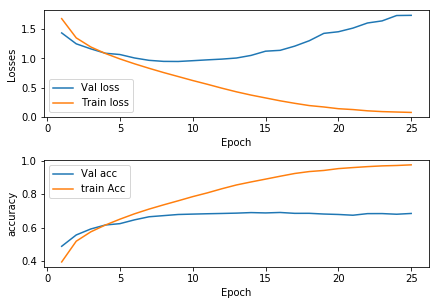

In [0]:
from keras.optimizers import SGD, rmsprop
model_ws = Sequential()
model_ws.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_ws.add(Conv2D(64, (3,3), strides=(2,2), padding= 'same', activation='linear'))
model_ws.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_ws.add(Conv2D(64, (3,3), strides=(2,2), padding= 'same', activation='linear'))
model_ws.add(Dropout(0.25))
model_ws.add(Flatten())
model_ws.add(Dense(512,activation='relu'))
model_ws.add(Dense(10,activation='softmax'))
model_ws.summary()

model_ws.compile(optimizer=rmsprop(lr=1e-4 , decay = 1e-6), loss= 'categorical_crossentropy', metrics=['accuracy'])
hist_ws= model_ws.fit(Xnorm_train, y_train, epochs=25, validation_data=(Xnorm_val, y_val))

plt.subplot(211)
plt.plot(np.arange(1,26,1), hist_ws.history['val_loss'])
plt.plot(np.arange(1,26,1), hist_ws.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Val loss', 'Train loss'])



plt.subplot(212)
plt.plot(np.arange(1,26,1), hist_ws.history['val_acc'])
plt.plot(np.arange(1,26,1), hist_ws.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Val acc', 'train Acc'])

plt.subplots_adjust(top = 0.99, left = 0.1, right=0.99, bottom= 0.1, hspace=0.4, wspace=0.25)

Observemos que en el primer gráfico, que muestra la relación de las *losses*, se ve que reemplezando el pooling por una capa convolucional de strides = (2,2), hace que haya un *overfiting* muchisimo mayor al inicial. Esto es debido a que hay más parámetros con los que trabaja, por lo tanto era esperable. Por otro lado, lo peor es que el accuracy alcanzó sólo un 65% y se estancó en ese valor rápidamente (antes de las primeras epoch, como se ve en el gráfico).

Luego de lo descrito anteriormente, se decidió agregar un filtro antes de entrar a la capa FF, ya que, como se explicó a lo largo de la tarea, al agregar más parámetros, arriesgamos un mayor *overfiting*. Dicho filtro no logró amortiguar tanto la situación ya que el *overfiting* sigue siendo excesivo y, por otro lado, el *accuracy* llegó sólo a 68%, en contraste con el modelo inicial que era un 70%.

**(J)** El siguiente procedimiento podría ayudar a mejorar el modelo ya que al cambiar de forma las imágenes, se tendrán mayores detalles (parámetros) de ellas. Ello hará que se tenga más información aumentando a precisión con la que se modela la red. Por otra parte, al aumentar la cantidad parámetros, podría aumentar el overfiting.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
model_rot = Sequential()
model_rot.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_rot.add(MaxPooling2D(pool_size=(2, 2)))
model_rot.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_rot.add(MaxPooling2D(pool_size=(2, 2)))
model_rot.add(Flatten())
model_rot.add(Dense(512,activation='relu'))
model_rot.add(Dense(10,activation='softmax'))
model_rot.summary()

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=30, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(Xnorm_train)

model_rot.compile(optimizer=rmsprop(lr=1e-4, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
hist_rot= model_rot.fit_generator(datagen.flow(Xnorm_train, y_train),steps_per_epoch=Xnorm_train.shape[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total para

**(K)** En lo que sigue utilizaremos un modelo importado por keras el cual posee pesos pre-entrenados que nos ayudará a estudiar desde otro punto de vista las imágenes de entrenamiento que disponemos.


In [0]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Concatenate
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

X_train_vgg = preprocess_input(x_train.astype('float32'))
X_test_vgg = preprocess_input(x_test.astype('float32'))
img_dim=X_train_vgg[1:]
input_tensor=input(img_dim)
modelVGG = VGG16(weights='imagenet', include_top=False, input_shape= (32,32,3)) # LOAD PRETRAINED MODEL 
mms = MinMaxScaler()
mms.fit(X_train_vgg)
Xnorm_train_vgg= mms.transform(X_train_vgg)
Xnorm_test_vgg = mms.transform(X_test_vgg)
features_train = modelVGG.predict(X_train_vgg)
features_test = modelVGG.predict(X_test_vgg)

#mms.fit(features_train)
#Xnorm_train_vgg= mms.transform(features_train)
#Xnorm_test_vgg = mms.transform(features_test)
modelVGG.summary()

[[[[ 9.1060997e+01  8.6221001e+01  5.6320000e+01]
   [ 6.8060997e+01  6.6221001e+01  2.3320000e+01]
   [ 6.8060997e+01  6.3221001e+01  2.4320000e+01]
   ...
   [ 4.8060997e+01  2.8221001e+01 -2.9680000e+01]
   [ 4.9060997e+01  2.7221001e+01 -2.6680000e+01]
   [ 4.8060997e+01  2.8221001e+01 -1.9680000e+01]]

  [[ 1.1906100e+02  1.1722100e+02  9.3320000e+01]
   [ 9.6060997e+01  9.8221001e+01  5.9320000e+01]
   [ 1.0006100e+02  1.0022100e+02  6.3320000e+01]
   ...
   [ 3.1060997e+01  1.6221001e+01 -3.6680000e+01]
   [ 3.2060997e+01  1.6221001e+01 -3.5680000e+01]
   [ 2.9060997e+01  1.5221001e+01 -2.7680000e+01]]

  [[ 1.3506100e+02  1.2722100e+02  1.0932000e+02]
   [ 9.8060997e+01  9.3221001e+01  6.1320000e+01]
   [ 1.0006100e+02  9.4221001e+01  6.0320000e+01]
   ...
   [-1.2939003e+01 -2.4778999e+01 -6.4680000e+01]
   [-1.1939003e+01 -2.4778999e+01 -6.5680000e+01]
   [-2.6939003e+01 -3.8778999e+01 -6.8680000e+01]]

  ...

  [[ 5.2060997e+01  5.6221001e+01  3.1320000e+01]
   [ 5.1060997e+

ValueError: ignored

In [0]:
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, rmsprop
from keras.models import Sequential
features_train=modelVGG.predict(Xnorm_train_vgg)
modelv = Sequential()
modelv.add(Flatten(input_shape=features_train.shape[1:]))
modelv.add(Dense(512, activation='relu'))
modelv.add(Dropout(0.5))
modelv.add(Dense(10, activation='softmax'))
#clasification
modelv.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
modelv.fit(features_train, y_train,epochs=25, batch_size=128,verbose=1,validation_data=(features_train,y_test))

NameError: ignored

-123.68